<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Import Library Yang Dibutuhkan
import numpy as np #operasi matematika dalam bentuk array
import pandas as pd #preprocessing dan data analisis
from datetime import datetime #mengambil data waktu
import matplotlib.pyplot as plt #visualisasi data
from sklearn.preprocessing import MinMaxScaler #mengskalakan data
import seaborn as sns #visualisasi data
import missingno as msno #mengidentifikasi data yang bernilai null
import matplotlib.pyplot as plt #visualisasi data
from mpl_toolkits.mplot3d import Axes3D #visualisasi data

In [34]:
#Membaca File .CSV
df = pd.read_csv("e-commerce.csv", delimiter=',', encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
#Menghitung Panjang Dataset
df.shape

(100247, 8)

In [36]:
#Melihat info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100247 entries, 0 to 100246
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    100247 non-null  object 
 1   StockCode    100247 non-null  object 
 2   Description  99948 non-null   object 
 3   Quantity     100247 non-null  int64  
 4   InvoiceDate  100247 non-null  object 
 5   UnitPrice    100246 non-null  float64
 6   CustomerID   65312 non-null   float64
 7   Country      100246 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.1+ MB


In [37]:
#Melihat Deskripsi Dataset Non Numerik
df.describe(exclude=['float64','int64']).T

,count,unique,top,freq
InvoiceNo,100247,4673,537434,675
StockCode,100247,3143,85123A,535
Description,99948,3049,WHITE HANGING HEART T-LIGHT HOLDER,545
InvoiceDate,100247,4220,12/6/2010 16:57,675
Country,100246,29,United Kingdom,92591


In [38]:
#Melihat Deskripsi Dataset Numerik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,100247.0,8.893124,336.149364,-74215.0,1.00,3.00,8.00,74215.00
UnitPrice,100246.0,5.392127,120.742730,0.0,1.25,2.51,4.25,16888.02
CustomerID,65312.0,15351.562607,1768.838360,12346.0,13871.00,15311.00,16995.25,18283.00


Total Jumlah Data Pengamatan: 100247


InvoiceNo          0
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     34935
Country            1
dtype: int64

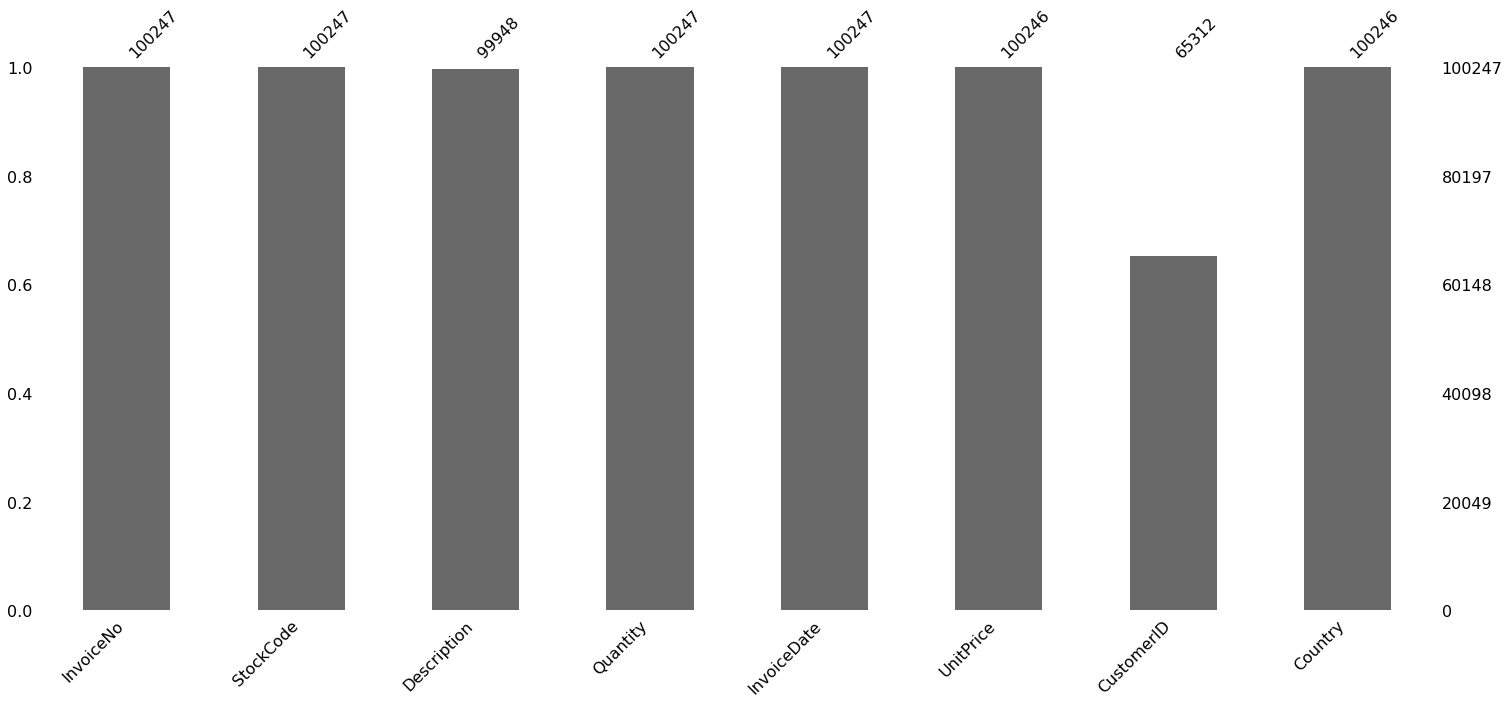

In [39]:
#Cek Nilai Kosong
print ('Total Jumlah Data Pengamatan:',df.shape[0])
msno.bar(df)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

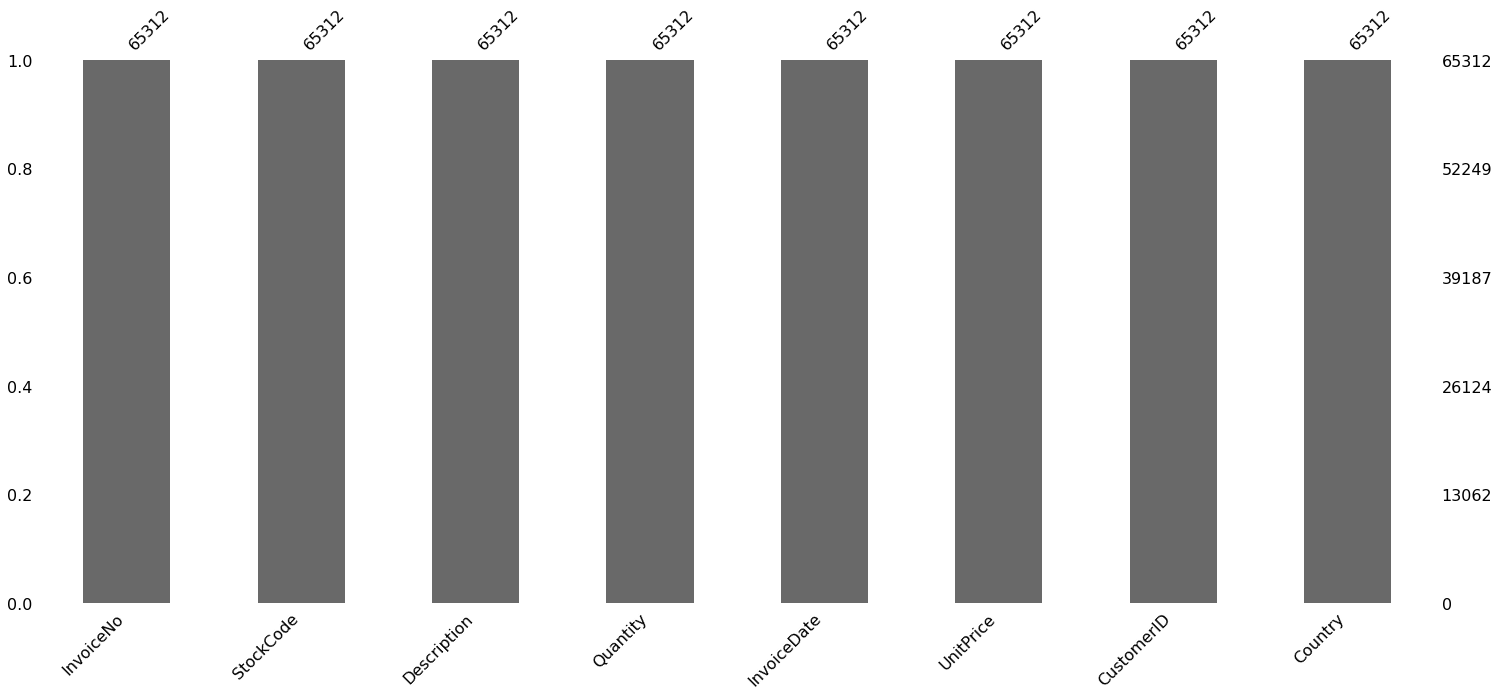

In [40]:
#Menghapus Baris yang Kosong
df.dropna(inplace =True)
msno.bar(df)
df.isnull().sum()

In [41]:
#Cek Data Yang Bernilai Negatif di Kolom Quantity dan Unit Price
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0] 

(1771, 0)

In [42]:
#Hapus Nilai yang Bernilai Negatif
df.drop(df[df['Quantity'] < 0].index, inplace = True)
df.drop(df[df['UnitPrice'] < 0].index, inplace = True)

In [43]:
#Cek Data Yang Bernilai Negatif di Kolom Quantity dan Unit Price Setelah dihapus
df[df['Quantity']<0].shape[0], df[df['UnitPrice']<0].shape[0] 

(0, 0)

In [44]:
#Menghitung Last Transaction
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
lt = df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt.head()

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,36
1,12347.0,Iceland,78
2,12348.0,Finland,68
3,12350.0,Norway,20
4,12352.0,Norway,7


In [45]:
#Join Kolom Customer ID dan No Invoice untuk Nomor Transaksi
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,60
2,12348.0,23
3,12350.0,17
4,12352.0,15


In [46]:
#Mencari Nilai Total Transaksi
df['TotalAmount']= df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
tm.head()

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,1187.18
2,12348.0,1120.24
3,12350.0,334.40
4,12352.0,296.50


In [47]:
#Menggabungkan Kolom Last Transaksi, InvoiceNo, dan Total Amount
merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
new_df=pd.merge(merge1,tm,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12346.0,United Kingdom,36,1,77183.60
1,12347.0,Iceland,78,60,1187.18
2,12348.0,Finland,68,23,1120.24
3,12350.0,Norway,20,17,334.40
4,12352.0,Norway,7,15,296.50
...,...,...,...,...,...
1599,18257.0,United Kingdom,7,16,363.80
1600,18259.0,United Kingdom,77,7,376.30
1601,18260.0,United Kingdom,68,37,787.77
1602,18269.0,United Kingdom,77,7,168.60


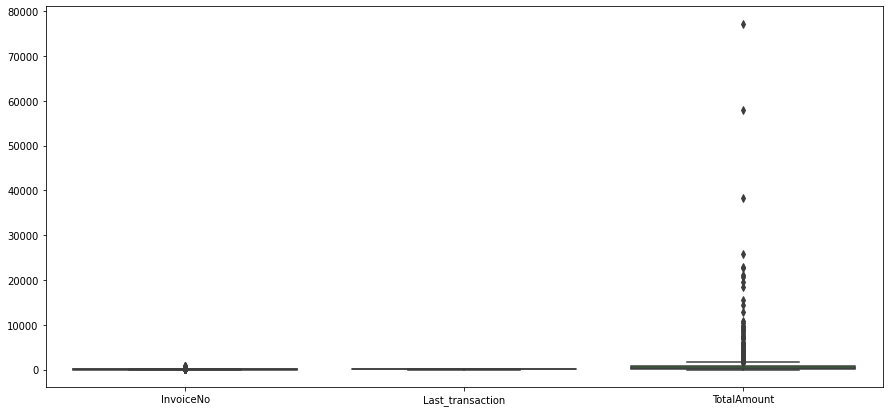

In [48]:
#Visualisasi Data
plt.figure(figsize=(15,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','TotalAmount']])
plt.show()

In [49]:
#Keterangan Data
IQR= new_df['TotalAmount'].quantile(0.75)-new_df['TotalAmount'].quantile(0.25)
lower_limit= new_df['TotalAmount'].quantile(0.25) - 1.5*IQR
upper_limit=new_df['TotalAmount'].quantile(0.75) + 1.5*IQR
k=new_df[new_df['TotalAmount']>upper_limit]
m=new_df[new_df['TotalAmount']<lower_limit]
df_iqr=new_df[(new_df['TotalAmount']<upper_limit) & (new_df['TotalAmount']>lower_limit)]
print('Jumlah Data Sebelum Menghapus Outlier',new_df.shape)
print('Jumlah Data Setelah Menghapus Outlier',df_iqr.shape)
print('Jumlah Data Outlier',len(k)+len(m))

Jumlah Data Sebelum Menghapus Outlier (1604, 5)
Jumlah Data Setelah Menghapus Outlier (1448, 5)
Jumlah Data Outlier 156


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


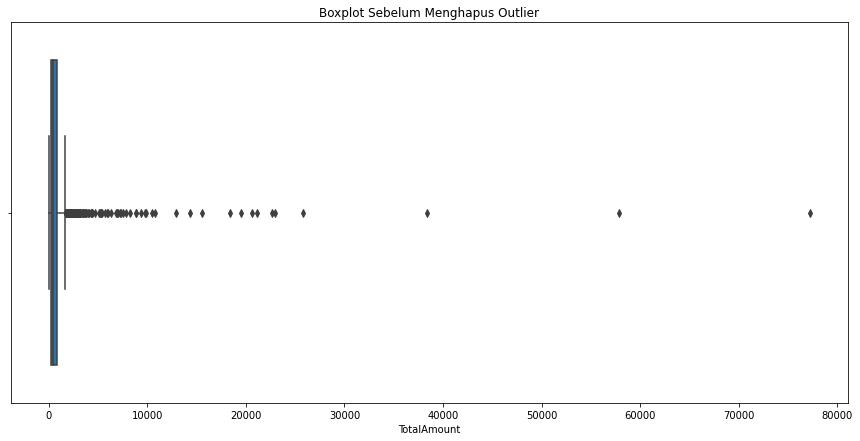

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


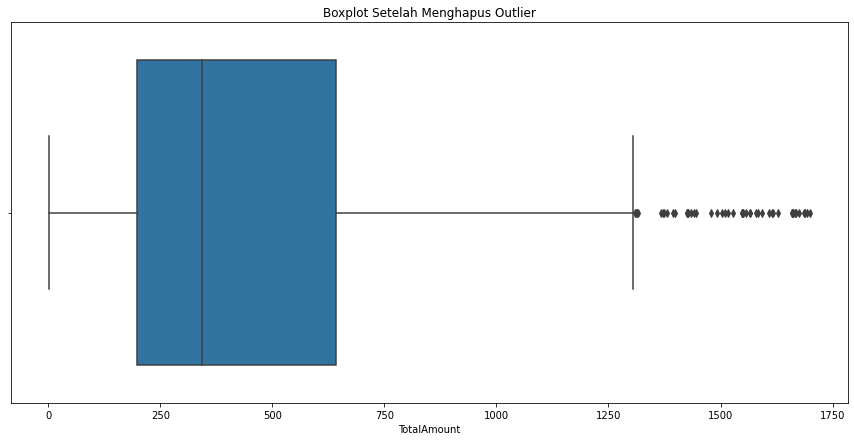

In [50]:
plt.figure(figsize=(15,7))
sns.boxplot(new_df['TotalAmount'])
plt.title('Boxplot Sebelum Menghapus Outlier')
plt.show()

plt.figure(figsize=(15,7))
sns.boxplot(df_iqr['TotalAmount'])
plt.title('Boxplot Setelah Menghapus Outlier')
plt.show()

In [51]:
#Data Setelah Penghapusan Outlier
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,TotalAmount
0,12347.0,Iceland,78,60,1187.18
1,12348.0,Finland,68,23,1120.24
2,12350.0,Norway,20,17,334.40
3,12352.0,Norway,7,15,296.50
4,12362.0,Belgium,6,27,479.10
...,...,...,...,...,...
1443,18257.0,United Kingdom,7,16,363.80
1444,18259.0,United Kingdom,77,7,376.30
1445,18260.0,United Kingdom,68,37,787.77
1446,18269.0,United Kingdom,77,7,168.60


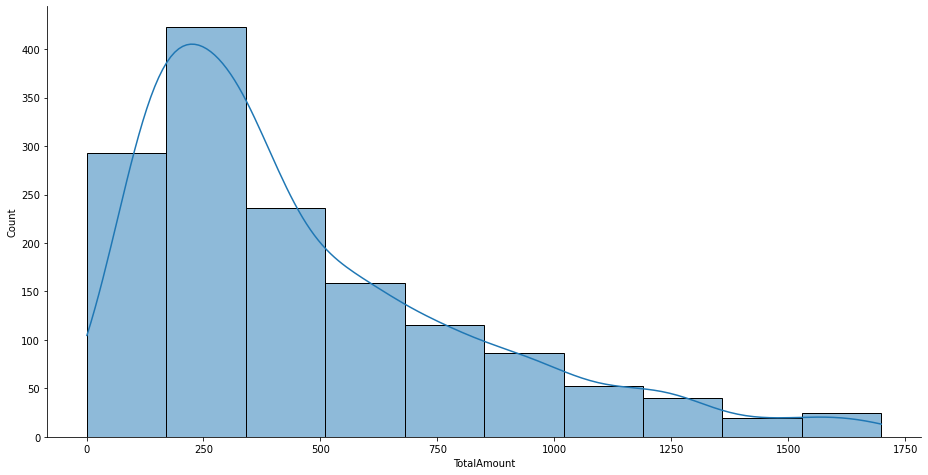

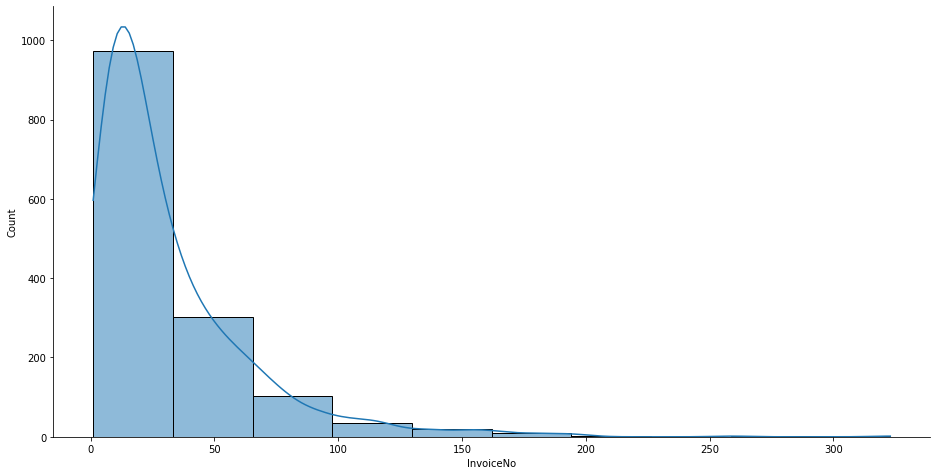

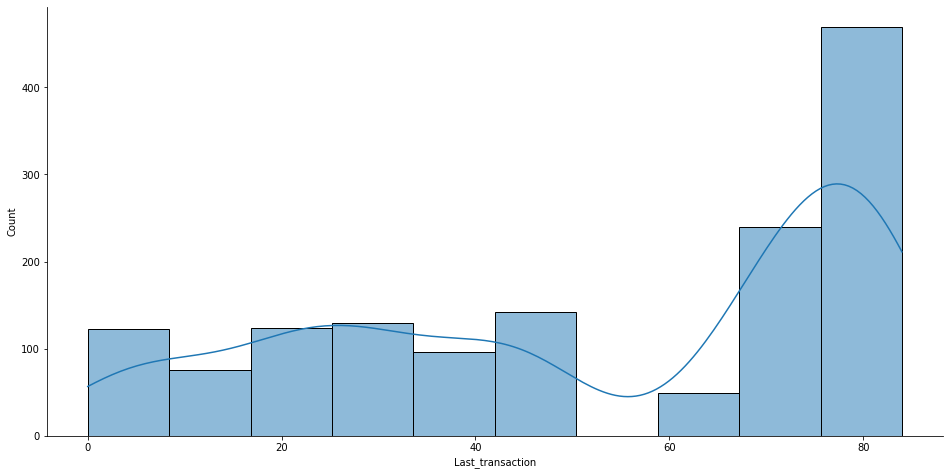

In [52]:
#Visualisasi Data Berdasarkan Kolom
new1_df=df_iqr.copy()
df_num=['TotalAmount','InvoiceNo','Last_transaction']
for i in df_num:
    sns.displot(new1_df[i],bins=10,kde=True)
    plt.gcf().set_size_inches(15, 7)
    plt.show()

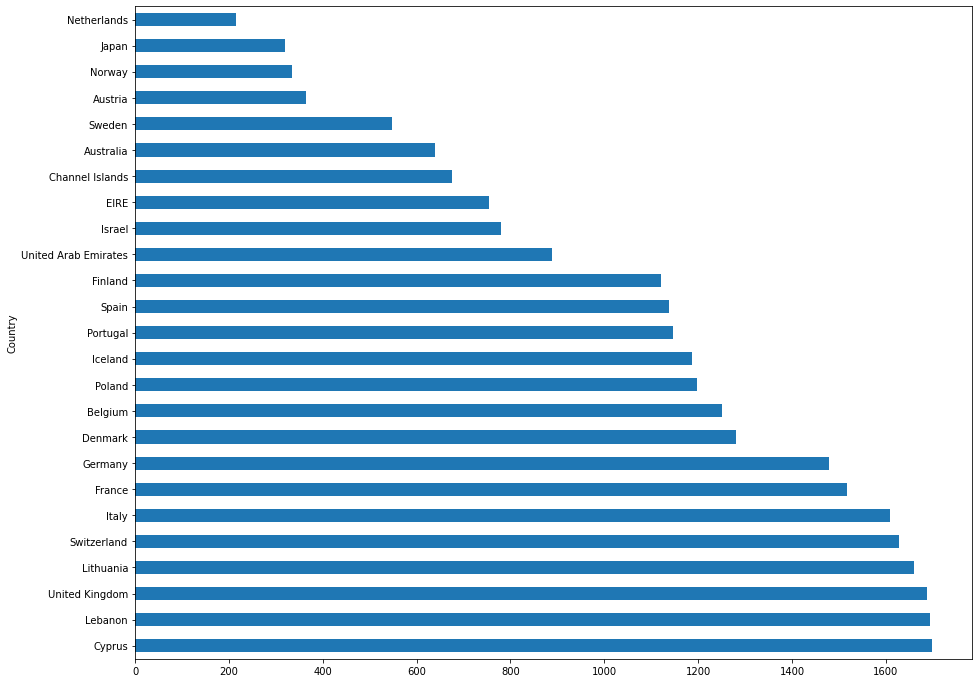

In [53]:
#Visualisasi Total Transaksi Maksimum Bersarkan Negara
plt.figure(figsize=(15,12))
new1_df.groupby("Country").TotalAmount.max().sort_values(ascending=False).plot.barh()
plt.show()

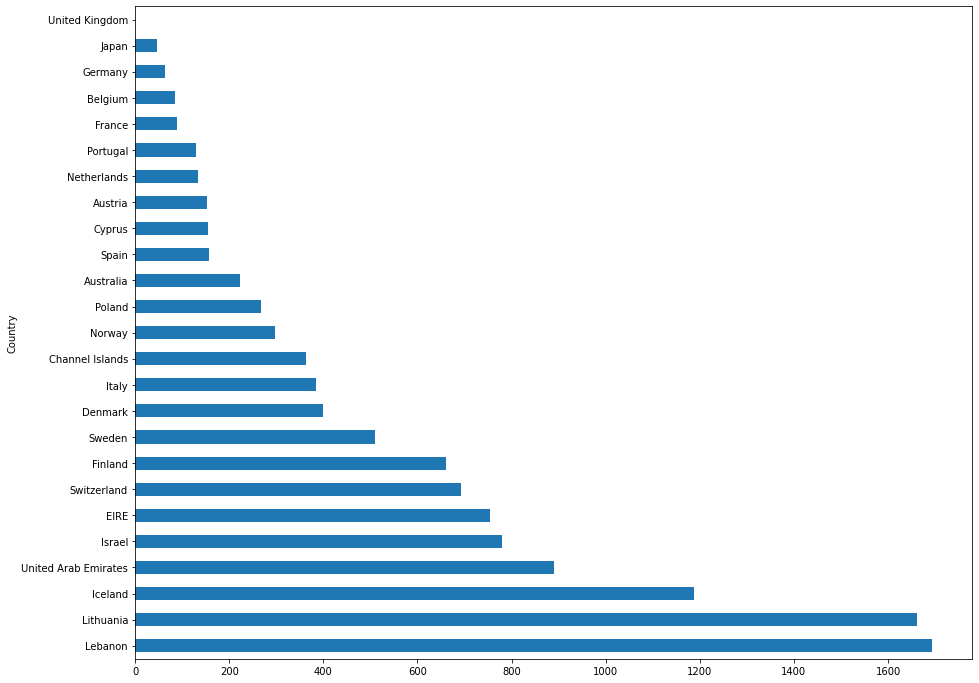

In [54]:
#Visualisasi Total Transaksi Minimum Bersarkan Negara
plt.figure(figsize=(15,12))
new1_df.groupby("Country").TotalAmount.min().sort_values(ascending=False).plot.barh()
plt.show()

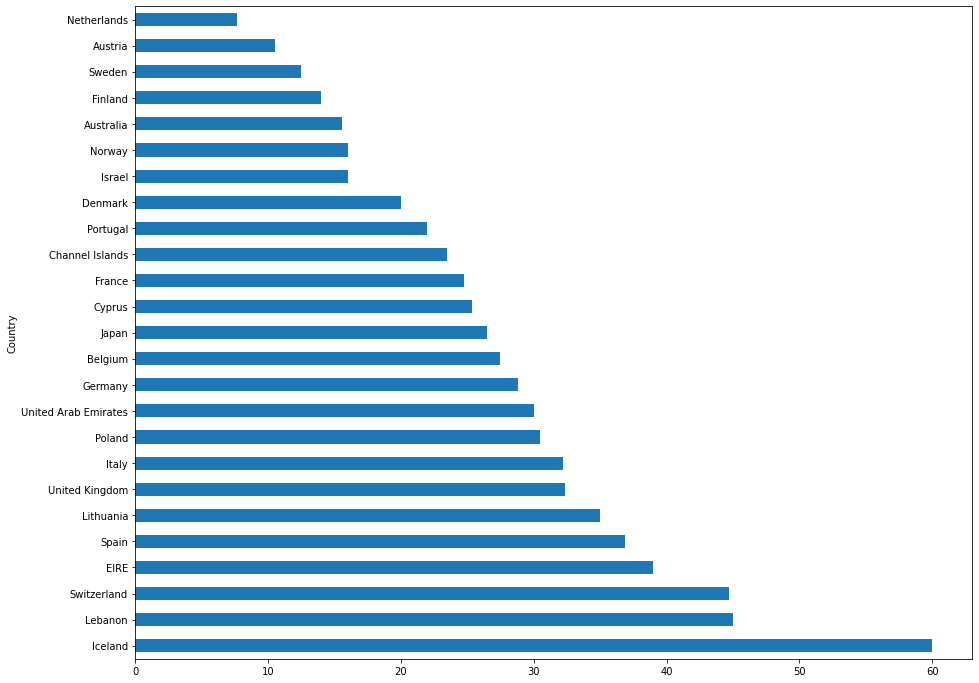

In [55]:
#Visualisasi Jumlah Frekuensi Terbanyak Berdasarkan Negara
plt.figure(figsize=(15,12))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh()
plt.show()

In [56]:
#Scaling pada Data 
new2_df=new1_df[['Last_transaction','InvoiceNo','TotalAmount']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Last_transaction','InvoiceNo','TotalAmount']
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,TotalAmount,Country
0,0.928571,0.183230,0.698643,Iceland
1,0.809524,0.068323,0.659221,Finland
2,0.238095,0.049689,0.196431,Norway
3,0.083333,0.043478,0.174111,Norway
4,0.071429,0.080745,0.281647,Belgium
...,...,...,...,...
1443,0.083333,0.046584,0.213745,United Kingdom
1444,0.916667,0.018634,0.221107,United Kingdom
1445,0.809524,0.111801,0.463426,United Kingdom
1446,0.916667,0.018634,0.098790,United Kingdom


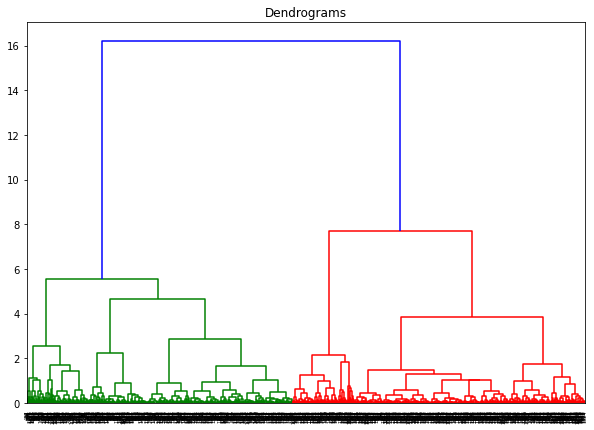

In [57]:
#Dendogram Data
import scipy.cluster.hierarchy as shc
df_k=scaled_df.drop(columns=['Country'],axis=1)
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))

In [59]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
two_clusters=cluster_new.fit_predict(df_k)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
three_clusters=cluster_new.fit_predict(df_k)

df_k['two_clusters'] = two_clusters
df_k['three_clusters']= three_clusters
df_k

,Last_transaction,InvoiceNo,TotalAmount,two_clusters,three_clusters
0,0.928571,0.183230,0.698643,0,2
1,0.809524,0.068323,0.659221,0,2
2,0.238095,0.049689,0.196431,1,0
3,0.083333,0.043478,0.174111,1,0
4,0.071429,0.080745,0.281647,1,0
...,...,...,...,...,...
1443,0.083333,0.046584,0.213745,1,0
1444,0.916667,0.018634,0.221107,0,1
1445,0.809524,0.111801,0.463426,0,1
1446,0.916667,0.018634,0.098790,0,1


No handles with labels found to put in legend.


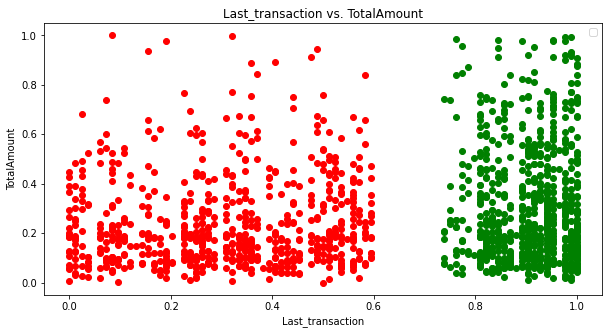

In [60]:
#Visualisasi Data dengan Dua Cluster
df1 = df_k[df_k.two_clusters==0]
df2 = df_k[df_k.two_clusters==1]
plt.figure(figsize=(10,5))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('Last_transaction vs. TotalAmount')
plt.show()

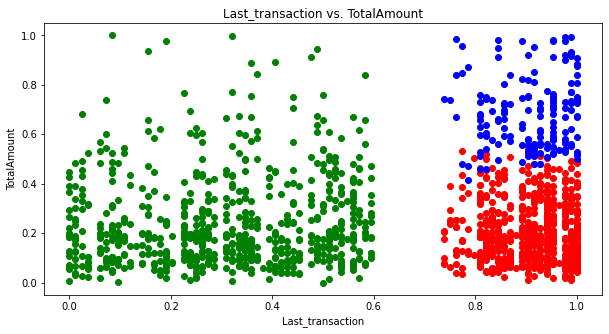

In [61]:
#Visualisasi Data dengan Tiga Cluster
df1 = df_k[df_k.three_clusters==0]
df2 = df_k[df_k.three_clusters==1]
df3 = df_k[df_k.three_clusters==2]
plt.figure(figsize=(10,5))
plt.scatter(df1.Last_transaction,df1['TotalAmount'],color='green')
plt.scatter(df2.Last_transaction,df2['TotalAmount'],color='red')
plt.scatter(df3.Last_transaction,df3['TotalAmount'],color='blue')
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('Last_transaction vs. TotalAmount')
plt.show()

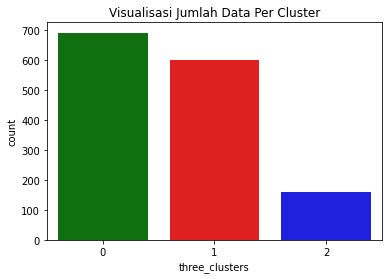

0    690
1    599
2    159
Name: three_clusters, dtype: int64


In [64]:
pal = ['green', 'red', 'blue']
pal = sns.countplot(x=df_k['three_clusters'], palette=pal)
plt.title('Visualisasi Jumlah Data Per Cluster')
plt.show()

cluster = df_k['three_clusters'].value_counts()
print(cluster)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0.92, 'Agglomerative Clustering 3D')

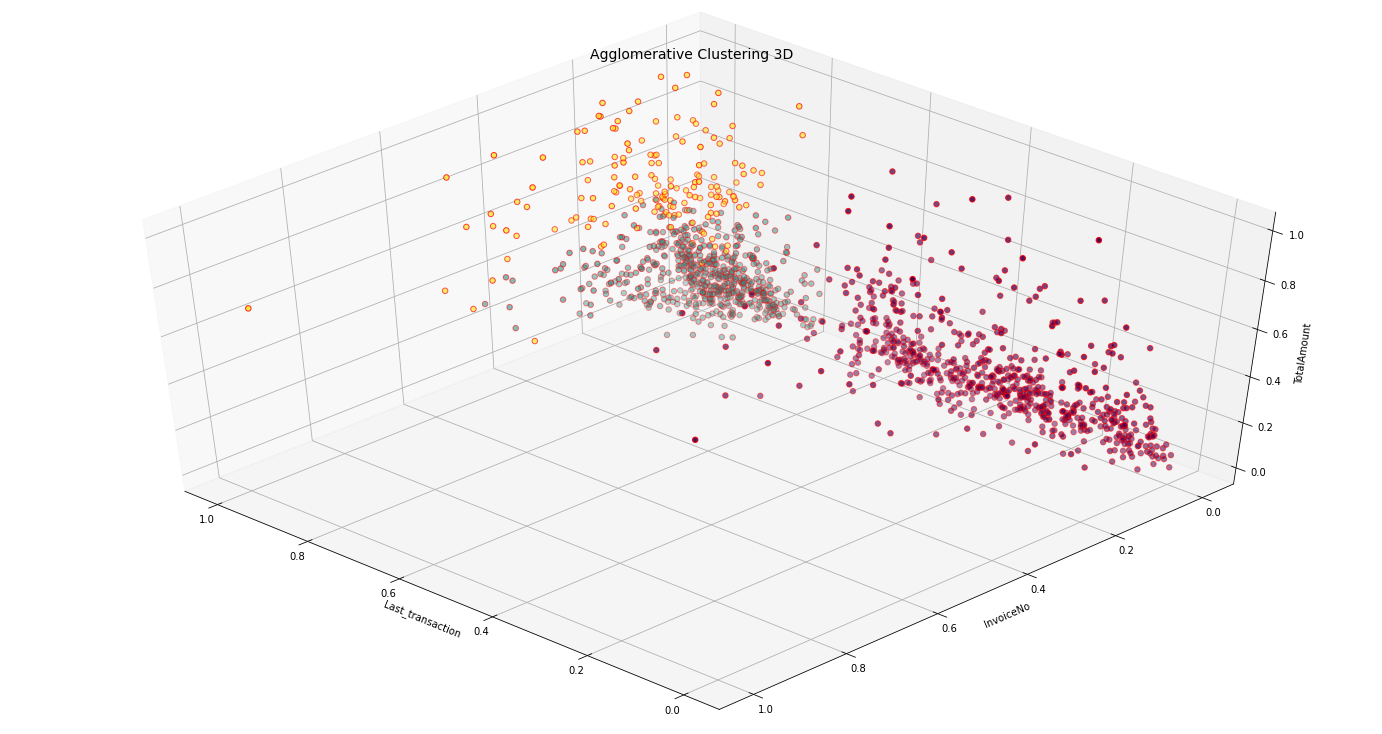

In [63]:
#Visualisasi 3D
km = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
km.fit(df_k)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(20,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(df_k['Last_transaction'], 
           df_k['InvoiceNo'], 
           df_k['TotalAmount'],
          c=labels.astype(np.float), 
           edgecolor="r", s=30)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("TotalAmount")
plt.title("Agglomerative Clustering 3D", fontsize=14)